In [1]:
# This example demonstrates the creation of a biased Bell state using qstack.
# A biased Bell state is a variation of the standard Bell state where the probabilities of measurement outcomes are intentionally skewed.
import qstack

program = None

In [2]:
%%qstack

@stack: toy

allocate q1 q2:
  skew(bias=0.8) q1
  entangle q1 q2
measure

Program(stack=Stack(target=LayerNode(lower=None, namespace='', layer=Layer(name='toy', quantum_definitions={QuantumDefinition(name='flip', targets_length=1, matrix=[[0, 1], [1, 0]], factory=None), QuantumDefinition(name='entangle', targets_length=2, matrix=[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], factory=None), QuantumDefinition(name='mix', targets_length=1, matrix=[[0.7071, 0.7071], [0.7071, -0.7071]], factory=None), QuantumDefinition(name='skew', targets_length=1, matrix=None, factory=<function skew at 0x7fc1d4bcc4a0>)}, classic_definitions={ClassicDefinition(name='vote', parameters=(), callback=<function vote at 0x7fc1d4bcc2c0>)}))), kernels=[Kernel(targets=(QubitId(value='q1'), QubitId(value='q2')), instructions=(QuantumInstruction(name='skew', targets=[QubitId(value='q1')], parameters={'bias': '0.8'}), QuantumInstruction(name='entangle', targets=[QubitId(value='q1'), QubitId(value='q2')], parameters={})), callback=None)])

In [3]:
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(program.stack)


In [4]:
# Perform a single-shot execution of the program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(program)


(1, 1)

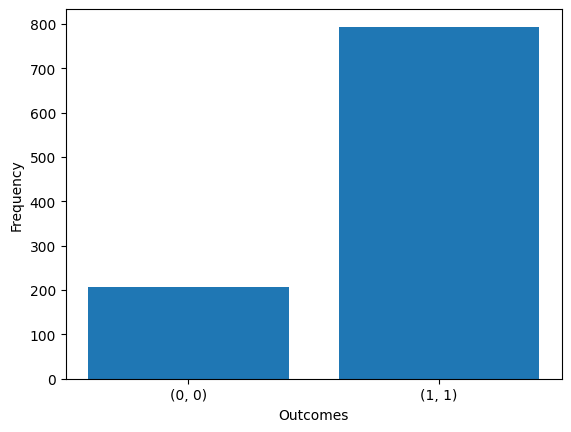

In [5]:
# Evaluate the program multiple times and plot the resulting histogram.
# This provides a statistical view of the biased Bell state.
machine.eval(program).plot_histogram()
